In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Bank_Stock_Price_10Y.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-03,1980.0,2000.0,1965.0,1965.0,1691.382568,55407000
1,2014-02-04,1970.0,1980.0,1940.0,1970.0,1695.686035,83683500
2,2014-02-05,1980.0,1990.0,1965.0,1990.0,1712.901367,42715000
3,2014-02-06,1975.0,2030.0,1970.0,2030.0,1747.331299,63581000
4,2014-02-07,2050.0,2060.0,2035.0,2050.0,1764.546753,104825500
...,...,...,...,...,...,...,...
2478,2024-01-24,9600.0,9600.0,9475.0,9525.0,9525.000000,84906000
2479,2024-01-25,9450.0,9575.0,9450.0,9500.0,9500.000000,63212700
2480,2024-01-26,9400.0,9450.0,9300.0,9350.0,9350.000000,78977300
2481,2024-01-29,9400.0,9550.0,9375.0,9550.0,9550.000000,73452800


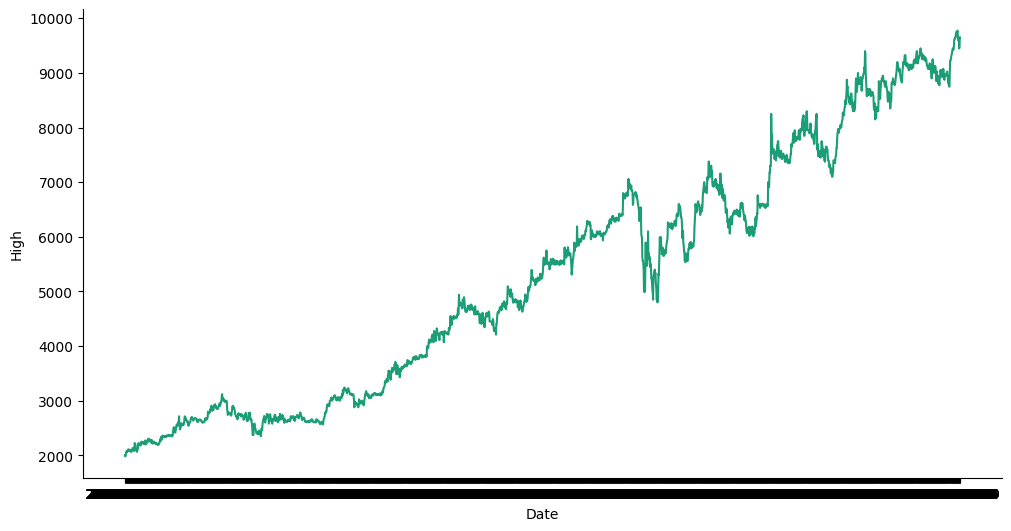

In [4]:
# @title Date vs High

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2483 non-null   object 
 1   Open       2483 non-null   float64
 2   High       2483 non-null   float64
 3   Low        2483 non-null   float64
 4   Close      2483 non-null   float64
 5   Adj Close  2483 non-null   float64
 6   Volume     2483 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.9+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2.483000e+03
mean,5219.973822,5265.847765,5173.628675,5219.887233,4886.148684,7.997496e+07
std,2223.156537,2240.113146,2206.459905,2223.903144,2276.934419,5.378122e+07
min,1970.000000,1980.000000,1940.000000,1965.000000,1691.382568,0.000000e+00
25%,2955.000000,2985.000000,2930.000000,2950.000000,2612.564454,5.153575e+07
50%,5170.000000,5235.000000,5120.000000,5180.000000,4736.543945,7.009800e+07
75%,6822.500000,6890.000000,6740.000000,6800.000000,6349.964111,9.651755e+07
max,9775.000000,9775.000000,9675.000000,9750.000000,9750.000000,1.062862e+09


In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-03,1980.0,2000.0,1965.0,1965.0,1691.382568,55407000
1,2014-02-04,1970.0,1980.0,1940.0,1970.0,1695.686035,83683500
2,2014-02-05,1980.0,1990.0,1965.0,1990.0,1712.901367,42715000
3,2014-02-06,1975.0,2030.0,1970.0,2030.0,1747.331299,63581000
4,2014-02-07,2050.0,2060.0,2035.0,2050.0,1764.546753,104825500


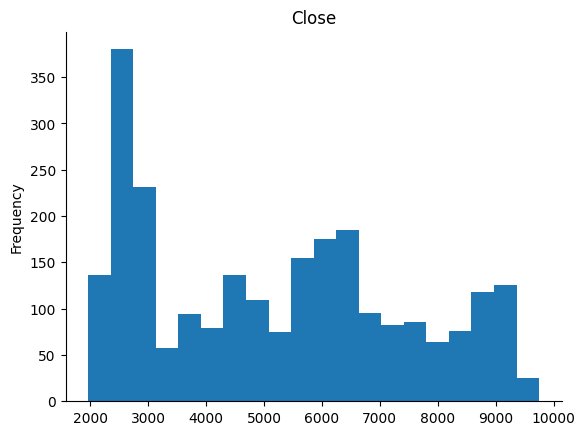

In [21]:
# @title Close

from matplotlib import pyplot as plt
data['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:

data_monthly = data.groupby(data['Date'].dt.to_period('M'))[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].mean().reset_index()


In [11]:
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y =data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
from sklearn.tree import DecisionTreeRegressor

model1= DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
y_pred = model1.predict(X_test)

In [16]:
#Accuracy
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.3073825503355705
